<a href="https://colab.research.google.com/github/tk231/DSBio2020/blob/main/DSBio_Ex_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: Lotka-Volterra

The ordinary differential equations of the Lotka-Volterra model, $\dot{\vec{x}} = f(\vec{x})$ are given by

\begin{align}
  \dot{x} &= a \cdot x(t) - b \cdot x(t) \cdot y(t) \\
  \dot{y} &= c \cdot x(t) \cdot y(t) - d \cdot y(t)
\end{align}

where $x(t)$ is the prey population and $y(t)$ the predator population. Note that $a, b, c, d \in \R_{+}$.

## a) 
Write a function `eulerLV` which integrates the Lotka-Volterra model using the Euler method for a set of initial values `init`, parameters `pars`, integration step size `dt` for times $t \in [0, t_{\mathrm{max}} ]$. The function should return three variables, `time`, `x` and `y`.

We first import the libraries needed:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def eulerLV(init, pars, dt, tmax):
  """
  Function to calculate the Lotka-Voltera equations via use of the Euler method

  Parameters:
  -----------
  """
  times = np.arange(0, tmax + dt, dt)
  stop = len(times)

  x = [init[0]]
  y = [init[1]]

  for step in np.arange(0, stop-1, 1):
    fx = (pars[0] * x[step]) - (pars[1] * x[step] * y[step])
    fy = (pars[2] * x[step] * y[step]) - (pars[3] * y[step])
    x.append(x[step] + (fx * dt))
    y.append(y[step] + (fy * dt))

  return times, x, y

## b)
Plot the solutions of the LV system in the configuration space, i.e. $(t;x(t))$ and $(t;y(t))$, and phase space, i.e. $(x(t);y(t))$, for parameters $a = 2/3$, $b = 4/30$, $c = 1/10$, $d = 1$ and two different sets of initial values: $x_{1}(t = 0), y_{1}(t = 0) = (10,15)$ and $x_{2}(t = 0), y_{2}(t = 0) = (15,10)$ .

In [ ]:
init1 = [10, 15]
init2 = [15, 10]

pars = [2/3, 4/30, .1, 1]
dt = 0.1
tmax = 50

t1, prey1, predator1 = eulerLV(init1, pars, dt, tmax)
t2, prey2, predator2 = eulerLV(init2, pars, dt, tmax)

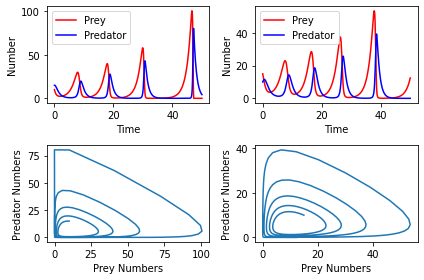

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0,0].plot(t1, prey1, 'r', label='Prey')
axs[0,0].plot(t1, predator1, 'b', label='Predator')
axs[0,0].set_xlabel('Time')
axs[0,0].set_ylabel('Number')
axs[0,0].legend()

axs[0,1].plot(t2, prey2, 'r', label='Prey')
axs[0,1].plot(t2, predator2, 'b', label='Predator')
axs[0,1].set_xlabel('Time')
axs[0,1].set_ylabel('Number')
axs[0,1].legend()

axs[1,0].plot(prey1, predator1, label='Phase Space')
axs[1,0].set_xlabel('Prey Numbers')
axs[1,0].set_ylabel('Predator Numbers')

axs[1,1].plot(prey2, predator2, label='Phase Space')
axs[1,1].set_xlabel('Prey Numbers')
axs[1,1].set_ylabel('Predator Numbers')

plt.tight_layout()
plt.show()

## c)
Add a noise term to the Euler-intergation in each step: $x_{n+1} = x_{n} + f (x_{n}) \cdot  dt + \epsilon \cdot \sqrt{dt}$ with $\epsilon \propto N(0;sd)$.

Use `sd` as additional argument of your Euler function and avoid $x_{n} < 0$. Compare the solutions for $\mathrm{sd} = 0.3$ to the standard solutions without noise by plotting.

In [ ]:
def eulerLV_noise(init, pars, dt, tmax, sd):
  """
  Function to calculate the Lotka-Voltera equations plus normally distributed noise via use of the Euler method. 

  Parameters:
  -----------
  """
  times = np.arange(0, tmax + dt, dt)
  stop = len(times)

  x = [init[0]]
  y = [init[1]]

  for step in np.arange(0, stop - 1, 1):
    eps = np.random.default_rng().normal(loc=0, scale=sd)

    fx = (pars[0] * x[step]) - (pars[1] * x[step] * y[step])
    fy = (pars[2] * x[step] * y[step]) - (pars[3] * y[step])

    x_temp = x[step] + (fx * dt) + (np.sqrt(dt) * eps)
    y_temp = y[step] + (fy * dt) + (np.sqrt(dt) * eps)

    if x_temp < 0:
      x.append(0)
      y.append(y_temp)
    elif y_temp < 0:
      x.append(x_temp)
      y.append(0)
    else:
      x.append(x_temp)
      y.append(y_temp)

  return times, x, y

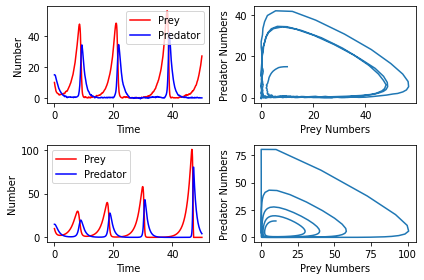

In [ ]:
sd = 0.5

t_noise, prey_noise, predator_noise = eulerLV_noise(init1, pars, dt, tmax, sd)
t_nonoise, prey_nonoise, predator_nonoise = eulerLV(init1, pars, dt, tmax)

fig_noise, axs_noise = plt.subplots(2, 2)
axs_noise[0,0].plot(t_noise, prey_noise, 'r', label='Prey')
axs_noise[0,0].plot(t_noise, predator_noise, 'b', label='Predator')
axs_noise[0,0].set_xlabel('Time')
axs_noise[0,0].set_ylabel('Number')
axs_noise[0,0].legend()

axs_noise[0,1].plot(prey_noise, predator_noise, label='Phase Space')
axs_noise[0,1].set_xlabel('Prey Numbers')
axs_noise[0,1].set_ylabel('Predator Numbers')

axs_noise[1,0].plot(t_nonoise, prey_nonoise, 'r', label='Prey')
axs_noise[1,0].plot(t_nonoise, predator_nonoise, 'b', label='Predator')
axs_noise[1,0].set_xlabel('Time')
axs_noise[1,0].set_ylabel('Number')
axs_noise[1,0].legend()

axs_noise[1,1].plot(prey_nonoise, predator_nonoise, label='Phase Space')
axs_noise[1,1].set_xlabel('Prey Numbers')
axs_noise[1,1].set_ylabel('Predator Numbers')

plt.tight_layout()
plt.show()